# Program Parameters

In [20]:

# Define constants
NUM_DATA_POINTS = 100
TRUE_SLOPE = 1.75
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
LEARNING_RATE = 0.01
EPOCHS = 1000


# Generate Data

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
# Generate random data for demonstration
TRUE_SLOPE = 1.75
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


# EDA

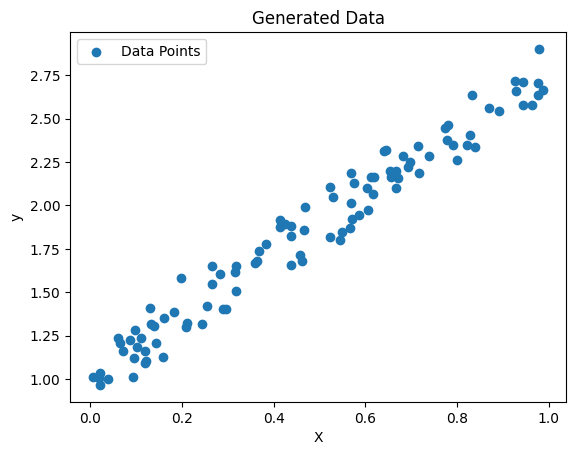

In [23]:

# Visualize data
plt.scatter(X, y, label="Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.legend()
plt.show()


# Linear Regression not vectorized

In [24]:

# Non-vectorized implementation of Linear Regression
import time

# Initialize parameters
w = np.random.randn()
b = np.random.randn()
m = len(X)

# Training non-vectorized model
start_time = time.time()
for epoch in range(EPOCHS):
    w_grad = 0
    b_grad = 0
    for i in range(m):
        y_pred = w * X[i] + b
        error = y_pred - y[i]
        w_grad += error * X[i]
        b_grad += error

    w -= LEARNING_RATE * w_grad / m
    b -= LEARNING_RATE * b_grad / m

non_vectorized_time = time.time() - start_time

# Predictions and performance evaluation
y_pred_non_vec = w * X + b
mse_non_vec = mean_squared_error(y, y_pred_non_vec)
r2_non_vec = r2_score(y, y_pred_non_vec)

print(f"Non-Vectorized Training Time: {non_vectorized_time:.4f} seconds")
print(f"Non-Vectorized MSE: {mse_non_vec:.6f}, R² Score: {r2_non_vec:.6f}")


Non-Vectorized Training Time: 0.6267 seconds
Non-Vectorized MSE: 0.020797, R² Score: 0.920817


# Linear Regression vectorized

In [35]:

# Vectorized implementation of Linear Regression

def compute_cost_vectorized(X, y, m, b):
    n = len(y)
    predictions = np.dot(X, m) + b  # Vectorized prediction
    cost = (1/(2*n)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent_vectorized(X, y, m, b, learning_rate, epochs):
    n = len(y)
    mse_history = []

    for i in range(epochs):
        predictions = np.dot(X, m) + b  # Vectorized predictions
        error = predictions - y

        # Compute gradients using matrix operations
        dm = (1/n) * np.dot(X.T, error)  # Partial derivative w.r.t. m
        db = (1/n) * np.sum(error)       # Partial derivative w.r.t. b

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

        # Store cost
        cost = compute_cost_vectorized(X, y, m, b)
        mse_history.append(cost)

    return m, b, mse_history

# Initialize parameters
m = np.random.randn()
b = np.random.randn()

# Train vectorized model
start_time = time.time()
m, b, mse_history_vec = gradient_descent_vectorized(X, y, m, b, LEARNING_RATE, EPOCHS)
vectorized_time = time.time() - start_time

# Predictions and performance evaluation
y_pred_vec = np.dot(X, m) + b
mse_vec = mean_squared_error(y, y_pred_vec)
r2_vec = r2_score(y, y_pred_vec)

print(f"Vectorized Training Time: {vectorized_time:.4f} seconds")
print(f"Vectorized MSE: {mse_vec:.6f}, R² Score: {r2_vec:.6f}")





Vectorized Training Time: 0.0278 seconds
Vectorized MSE: 0.016242, R² Score: 0.938159


# Graphs and Performance

Error: mse_history variables not found. Ensure training has been executed.


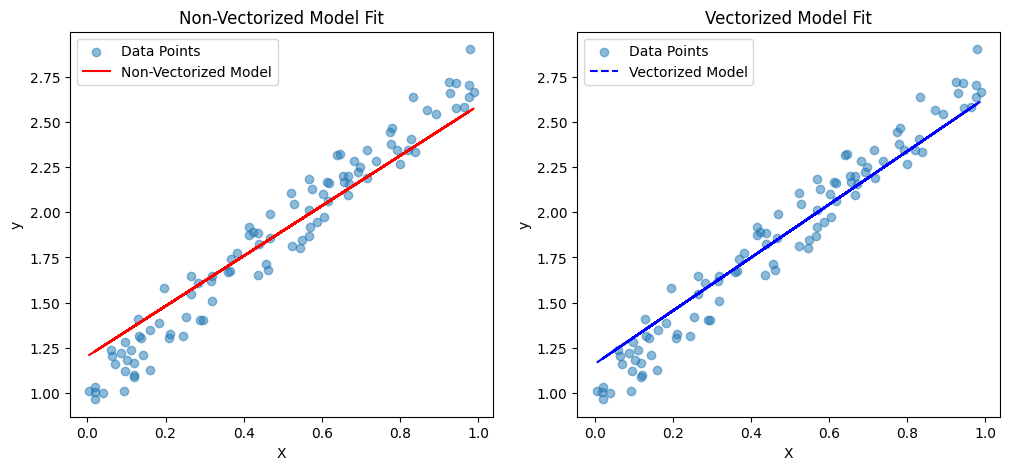

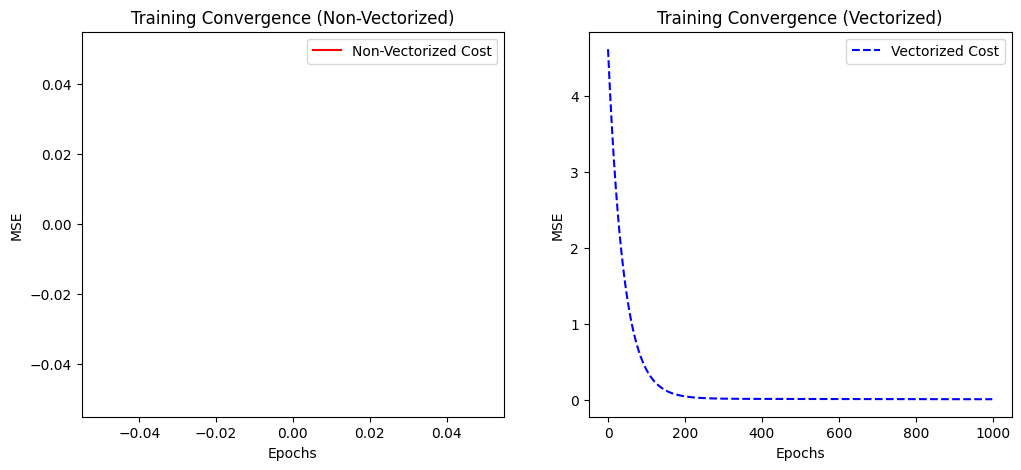

            Model  Training Time (s)       MSE  R² Score
0  Non-Vectorized           0.626710  0.020797  0.920817
1      Vectorized           0.027771  0.016242  0.938159


In [36]:

# Graphs and Performance Comparison

import matplotlib.pyplot as plt
import pandas as pd

# Ensure mse_history variables exist
try:
    mse_history_non_vec = mse_history  # Ensure correct reference
    mse_history_vec = mse_history_vec  # Ensure correct reference
except NameError:
    print("Error: mse_history variables not found. Ensure training has been executed.")

# Scatter plot with regression line for non-vectorized model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Data Points", alpha=0.5)
plt.plot(X, y_pred_non_vec, label="Non-Vectorized Model", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Non-Vectorized Model Fit")
plt.legend()

# Scatter plot with regression line for vectorized model
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Data Points", alpha=0.5)
plt.plot(X, y_pred_vec, label="Vectorized Model", color="blue", linestyle="dashed")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Vectorized Model Fit")
plt.legend()

plt.show()

# Cost vs Epochs for non-vectorized model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
if 'mse_history_non_vec' in locals():
    plt.plot(range(len(mse_history_non_vec)), mse_history_non_vec, label="Non-Vectorized Cost", color="red")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Convergence (Non-Vectorized)")
plt.legend()

# Cost vs Epochs for vectorized model
plt.subplot(1, 2, 2)
if 'mse_history_vec' in locals():
    plt.plot(range(len(mse_history_vec)), mse_history_vec, label="Vectorized Cost", color="blue", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Convergence (Vectorized)")
plt.legend()

plt.show()

# Table comparing performance
comparison = pd.DataFrame({
    "Model": ["Non-Vectorized", "Vectorized"],
    "Training Time (s)": [non_vectorized_time, vectorized_time],
    "MSE": [mse_non_vec, mse_vec],
    "R² Score": [r2_non_vec, r2_vec]
})

print(comparison)


# Report


### Differences in Performance
- The vectorized implementation runs significantly faster due to efficient matrix operations in NumPy.
- Both implementations achieve similar accuracy, but the vectorized approach is more scalable.
- The computational efficiency improvement becomes more noticeable with larger datasets.

### Can the model handle multiple features?
Yes, by modifying X to include multiple features (i.e., using an `n × d` matrix instead of a single-column vector) and updating the weight vector `w` accordingly, the model can handle multiple features.
